In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

from math import sqrt
from sklearn.metrics import r2_score

[Request Link](https://globalweather.tamu.edu/request/view/36316)\
[Direct download](https://globalweather.tamu.edu/data/cfsr/36316_2020-12-31-02-56-09.zip)

In [2]:
df = pd.read_csv('weatherdata-1611081.csv', index_col=False)
df

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,108.125,16.0798,21,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,108.125,16.0798,21,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,108.125,16.0798,21,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,108.125,16.0798,21,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,108.125,16.0798,21,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...,...,...,...
12923,7/27/2014,108.125,16.0798,21,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,108.125,16.0798,21,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,108.125,16.0798,21,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,108.125,16.0798,21,27.441,21.986,24.712369,1.054239,0.960196,23.610801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12928 non-null  object 
 1   Longitude          12928 non-null  float64
 2   Latitude           12928 non-null  float64
 3   Elevation          12928 non-null  int64  
 4   Max Temperature    12928 non-null  float64
 5   Min Temperature    12928 non-null  float64
 6   Precipitation      12928 non-null  float64
 7   Wind               12928 non-null  float64
 8   Relative Humidity  12928 non-null  float64
 9   Solar              12928 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1010.1+ KB


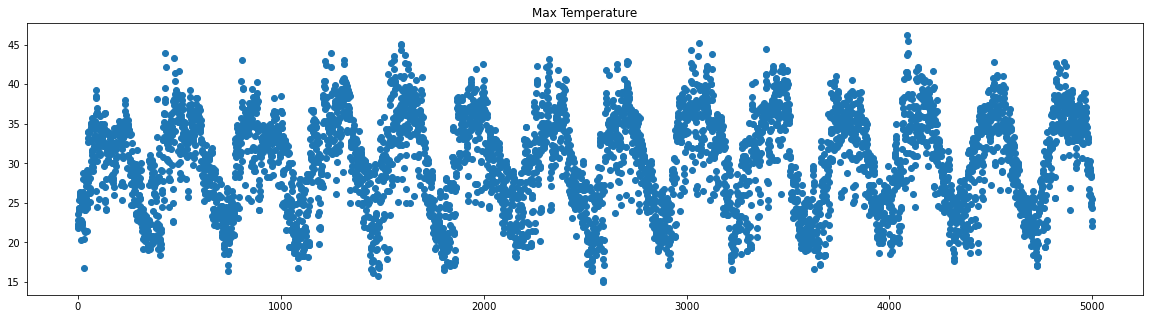

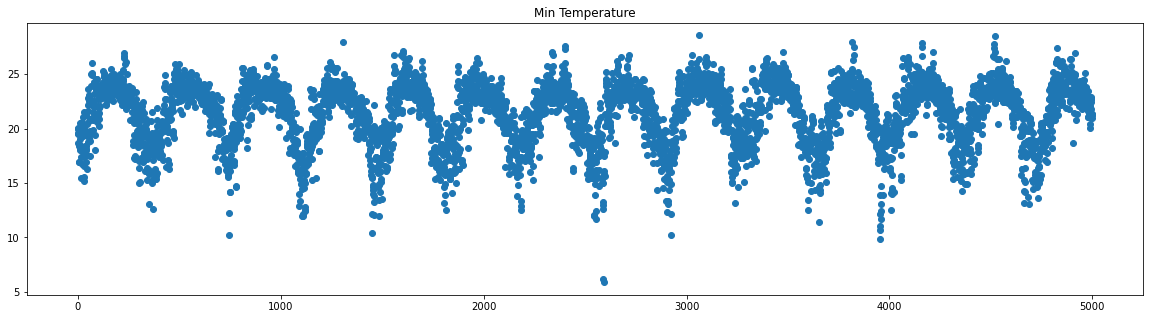

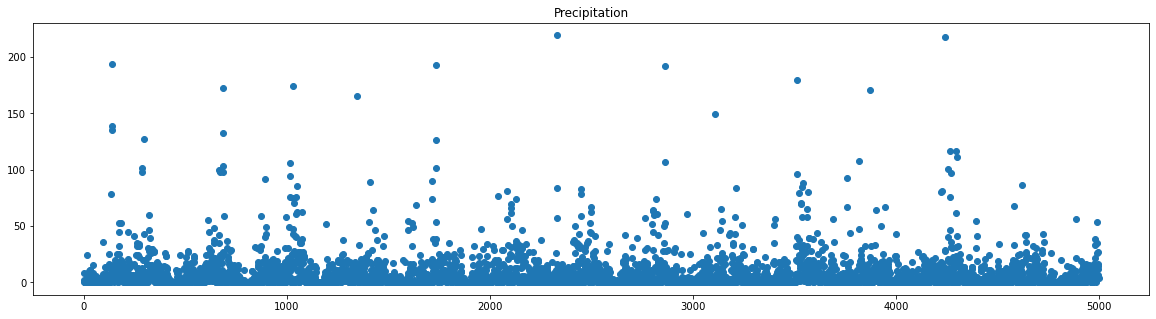

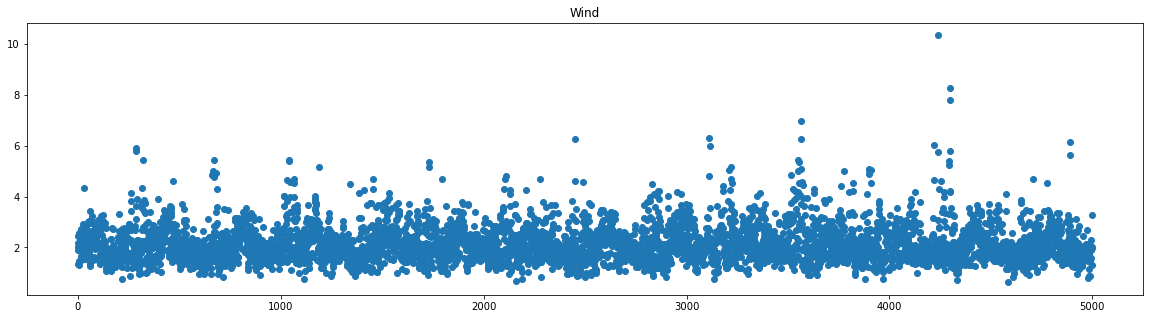

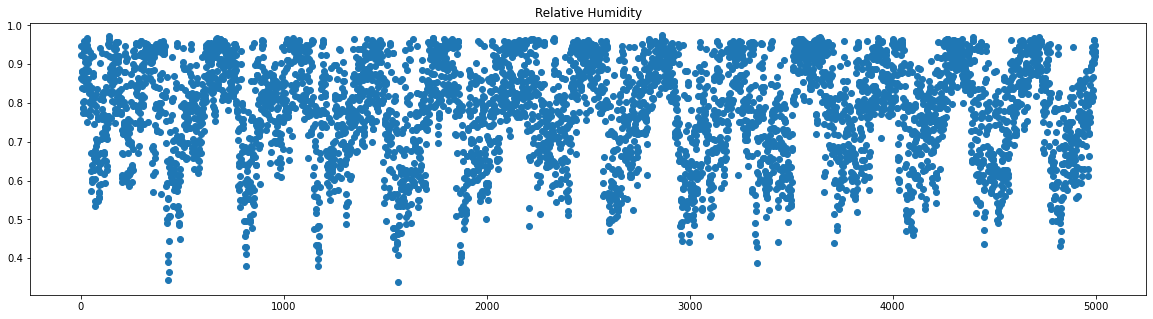

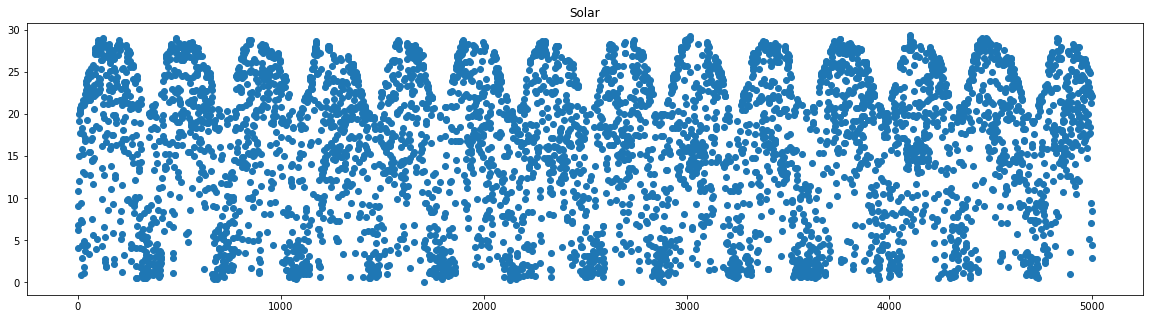

In [4]:
display_range = 5000
for col in [ 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity','Solar']:
    plt.figure(figsize=(20,5))
    plt.scatter(pd.RangeIndex(start=0, stop=display_range, step=1), df[col].head(display_range))
    plt.title(label=col)

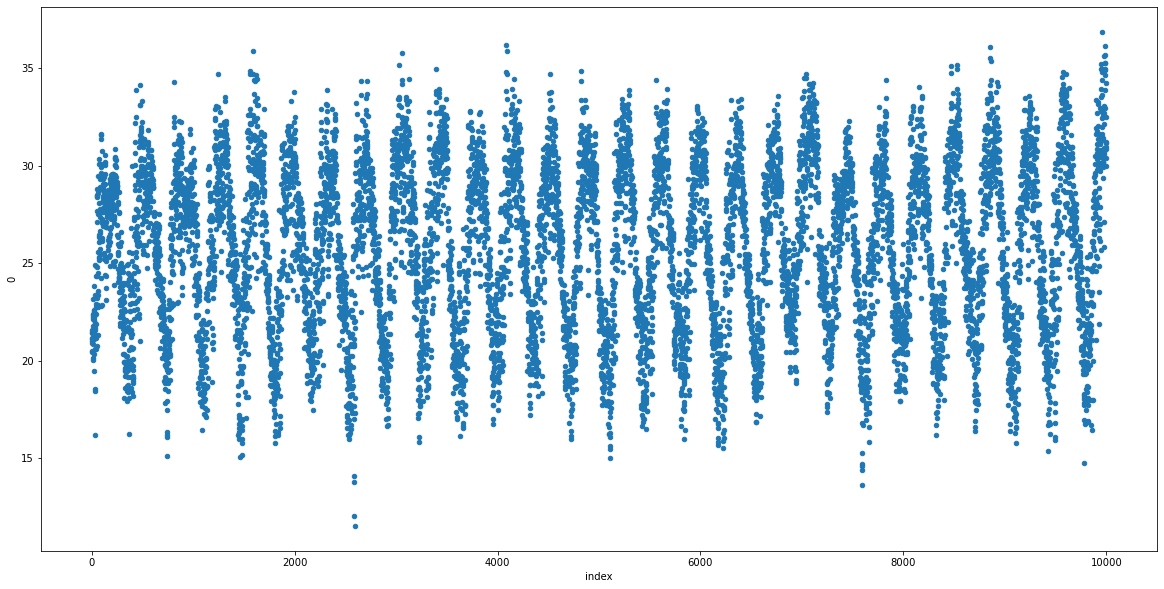

In [5]:
mean_temp = (df['Max Temperature'] + df['Min Temperature'])/2
mean_temp.head(10000).reset_index().plot(x='index', y=0, kind = 'scatter', figsize=[20,10])

### Thêm cột Mean Temperature (output) vào dataframe

In [6]:
df.insert(loc=3, column='Mean Temperature', value=mean_temp)
df

,Date,Longitude,Latitude,Mean Temperature,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,108.125,16.0798,20.9105,21,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,108.125,16.0798,21.0120,21,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,108.125,16.0798,21.1660,21,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,108.125,16.0798,20.4930,21,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,108.125,16.0798,21.5585,21,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...,...,...,...,...
12923,7/27/2014,108.125,16.0798,24.8995,21,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,108.125,16.0798,25.0675,21,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,108.125,16.0798,24.5860,21,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,108.125,16.0798,24.7135,21,27.441,21.986,24.712369,1.054239,0.960196,23.610801


---
# Derive n<sup>th</sup> day features (and drop some unnecessary columns):

In [7]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, nth_day_features=0):
        self.nth_day_features = nth_day_features
    def fit(self, X_df, y=None):
        return self
    def derive_nth_day_feature(self, X, feature, N):
        rows = X.shape[0]
        nth_prior_measurements = [None]*N + [X[feature][i-N] for i in range(N, rows)]
        col_name = "{} {}".format(feature, N)
        X[col_name] = nth_prior_measurements
    def transform(self, X, y=None):
        X_cl = X.copy()
        drop_col = X_cl.columns
        X_cl.drop(['Longitude','Latitude','Elevation','Date', 'Mean Temperature'], axis=1, errors='ignore', inplace=True)
        for feature in X_cl.columns:
            for N in range(1, self.nth_day_features + 1):
                self.derive_nth_day_feature(X_cl, feature, N)
        X_cl.drop(drop_col, axis=1, errors='ignore', inplace=True)
        X_cl.fillna(method='bfill', inplace=True)
        return X_cl

In [8]:
# TEST ColAdderDropper (Input)
coladderdropper = make_pipeline(ColAdderDropper(nth_day_features=3))
preprocessed_train_X = coladderdropper.transform(df)
preprocessed_train_X

,Max Temperature 1,Max Temperature 2,Max Temperature 3,Min Temperature 1,Min Temperature 2,Min Temperature 3,Precipitation 1,Precipitation 2,Precipitation 3,Wind 1,Wind 2,Wind 3,Relative Humidity 1,Relative Humidity 2,Relative Humidity 3,Solar 1,Solar 2,Solar 3
0,21.789,21.789,21.789,20.032,20.032,20.032,8.433718,8.433718,8.433718,2.442694,2.442694,2.442694,0.945526,0.945526,0.945526,6.279357,6.279357,6.279357
1,21.789,21.789,21.789,20.032,20.032,20.032,8.433718,8.433718,8.433718,2.442694,2.442694,2.442694,0.945526,0.945526,0.945526,6.279357,6.279357,6.279357
2,22.050,21.789,21.789,19.974,20.032,20.032,1.917458,8.433718,8.433718,2.021508,2.442694,2.442694,0.923605,0.945526,0.945526,4.131790,6.279357,6.279357
3,22.847,22.050,21.789,19.485,19.974,20.032,0.520134,1.917458,8.433718,1.363726,2.021508,2.442694,0.865097,0.923605,0.945526,6.813003,4.131790,6.279357
4,22.304,22.847,22.050,18.682,19.485,19.974,0.224876,0.520134,1.917458,1.887963,1.363726,2.021508,0.862533,0.865097,0.923605,9.143603,6.813003,4.131790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,29.872,30.240,29.414,20.916,21.603,22.036,35.108186,12.417981,14.024733,1.024239,1.409729,1.177197,0.934210,0.859401,0.949481,14.209014,9.487448,8.634759
12924,27.654,29.872,30.240,22.145,20.916,21.603,123.403941,35.108186,12.417981,0.722276,1.024239,1.409729,0.960563,0.934210,0.859401,11.988250,14.209014,9.487448
12925,27.882,27.654,29.872,22.253,22.145,20.916,38.002393,123.403941,35.108186,0.805266,0.722276,1.024239,0.950569,0.960563,0.934210,21.488302,11.988250,14.209014
12926,28.599,27.882,27.654,20.573,22.253,22.145,20.422551,38.002393,123.403941,0.824725,0.805266,0.722276,0.943231,0.950569,0.960563,9.977630,21.488302,11.988250


---

In [9]:
X = coladderdropper.transform(df)
y = df['Mean Temperature']
# Tách tập test và tập train theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Using Linear Regression:

In [10]:

regressor = LinearRegression()

regressor.fit(X_train, y_train)


# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("Model Score: " + str((regressor.score(X_test, y_test)*100).round(2)) + ' %')

Model Score: 87.51 %


---
# Using Neural Network:

In [11]:
display(X.head(5))
display(y.head(5))

,Max Temperature 1,Max Temperature 2,Max Temperature 3,Min Temperature 1,Min Temperature 2,Min Temperature 3,Precipitation 1,Precipitation 2,Precipitation 3,Wind 1,Wind 2,Wind 3,Relative Humidity 1,Relative Humidity 2,Relative Humidity 3,Solar 1,Solar 2,Solar 3
0,21.789,21.789,21.789,20.032,20.032,20.032,8.433718,8.433718,8.433718,2.442694,2.442694,2.442694,0.945526,0.945526,0.945526,6.279357,6.279357,6.279357
1,21.789,21.789,21.789,20.032,20.032,20.032,8.433718,8.433718,8.433718,2.442694,2.442694,2.442694,0.945526,0.945526,0.945526,6.279357,6.279357,6.279357
2,22.050,21.789,21.789,19.974,20.032,20.032,1.917458,8.433718,8.433718,2.021508,2.442694,2.442694,0.923605,0.945526,0.945526,4.131790,6.279357,6.279357
3,22.847,22.050,21.789,19.485,19.974,20.032,0.520134,1.917458,8.433718,1.363726,2.021508,2.442694,0.865097,0.923605,0.945526,6.813003,4.131790,6.279357
4,22.304,22.847,22.050,18.682,19.485,19.974,0.224876,0.520134,1.917458,1.887963,1.363726,2.021508,0.862533,0.865097,0.923605,9.143603,6.813003,4.131790


0    20.9105
1    21.0120
2    21.1660
3    20.4930
4    21.5585
Name: Mean Temperature, dtype: float64

In [12]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 75:25 (tương ứng train:val:test = 60:20:20)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [13]:
print(X_train_df.shape)
print(y_train_df.shape)

(7756, 18)
(7756,)


In [14]:
pipeline = make_pipeline(StandardScaler(),
                         MLPRegressor(hidden_layer_sizes=(12,12,12,12), activation='tanh', solver='adam', max_iter=5000))
train_errs = []
val_errs = []
alphas = [0.01, 0.15, 1, 3,5,6,10]
best_val_err = float('inf'); best_alpha = None;
                         
for alpha in alphas:
    pipeline.set_params(mlpregressor__alpha = alpha)
    pipeline.fit(X_train_df, y_train_df)
    pipeline.predict(X_val_df)
    train_err = (1 - pipeline.score(X_train_df, y_train_df))*100
    val_err = (1 - pipeline.score(X_val_df, y_val_df))*100
    if val_err < best_val_err:
        best_val_err = val_err
        best_alpha = alpha
    train_errs.append(train_err)
    val_errs.append(val_err)
'Done'

'Done'

## Trực quan hoá kết quả:

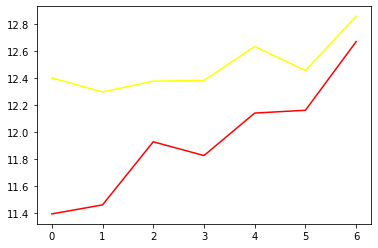

In [15]:
plt.plot(train_errs,color="red",)
plt.plot(val_errs,color="yellow")

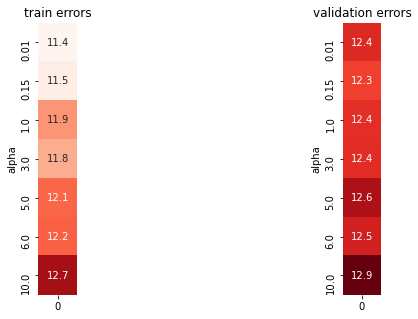

In [16]:
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.ylabel('alpha');

In [17]:
pipeline.set_params(mlpregressor__alpha = best_alpha)
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)
print("Model Score: " + str((pipeline.score(X_test, y_test)*100).round(2)) + ' %')

Model Score: 88.59 %
